In [3]:
 pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 660.6 kB/s eta 0:00:58
   ---------------------------------------- 0.1/38.1 MB 1.1 MB/s eta 0:00:37
   - -------------------------------------- 1.3/38.1 MB 11.6 MB/s eta 0:00:04
   ------ --------------------------------- 6.2/38.1 MB 39.8 MB/s eta 0:00:01
   ------------ --------------------------- 11.8/38.1 MB 108.8 MB/s eta 0:00:01
   ---------------- ----------------------- 15.4/38.1 MB 93.0 MB/s eta 0:00:01
   --------------------- ------------------ 20.9/38.1 MB 93.0 MB/s eta 0:00:01
   ------------------------- -------------- 24.3/38.1 MB 93.0 MB/s eta 0:00:01
   -------------------------- ------------- 25.4/38.1 MB 73.1 MB/s eta 0:00:01
 

In [7]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5

In [40]:
#Image Classifier

In [22]:
# Import needed libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam
from keras import optimizers
from tensorflow.keras.preprocessing import image

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [24]:
import seaborn as sns
import numpy as np
import cv2
import os

In [25]:
labels = ['cats', 'dogs']
img_size = 64

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

In [27]:
#Load Dataset
online_train = '/content/drive/MyDrive/Datasets/Cats&Dogs/data/cats_dogs2/train'
online_test = '/content/drive/MyDrive/Datasets/Cats&Dogs/data/cats_dogs2/test'

local_train = 'C:/Users/sndyg/Downloads/cats_dogs2/train'
local_test = 'C:/Users/sndyg/Downloads/cats_dogs2/test'

train = get_data(local_train)
val = get_data(local_test)

Text(0.5, 1.0, 'cats')

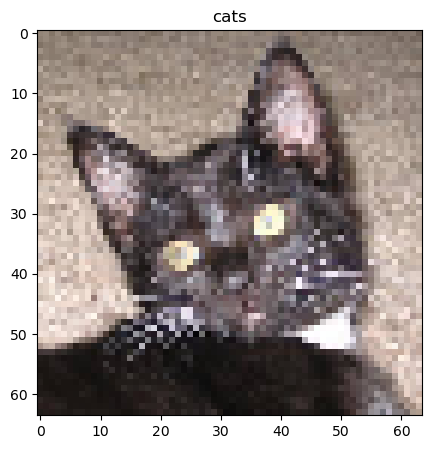

In [28]:
plt.figure(figsize = (5,5))
plt.imshow(train[5][0])
plt.title(labels[train[0][1]])

In [29]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [30]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening. ZCA Whitening is an image preprocessing method that leads to a transformation of data such that the covariance matrix is the identity matrix, leading to decorrelated features.
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [31]:
model = Sequential()
model.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(64, 64, 3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)         

In [32]:
opt = Adam(learning_rate=0.00001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [33]:
history = model.fit(x_train, y_train, epochs = 100 , validation_data = (x_val, y_val))

Epoch 1/100



C:\Users\sndyg\anaconda3\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



57/57 [==============================] - 3s 37ms/step - loss: 0.6956 - accuracy: 0.4961 - val_loss: 0.6926 - val_accuracy: 0.5200
Epoch 2/100
57/57 [==============================] - 2s 29ms/step - loss: 0.6953 - accuracy: 0.5128 - val_loss: 0.6924 - val_accuracy: 0.5050
Epoch 3/100
57/57 [==============================] - 2s 28ms/step - loss: 0.6950 - accuracy: 0.5028 - val_loss: 0.6911 - val_accuracy: 0.5150
Epoch 4/100
57/57 [==============================] - 2s 28ms/step - loss: 0.6895 - accuracy: 0.5444 - val_loss: 0.6910 - val_accuracy: 0.5250
Epoch 5/100
57/57 [==============================] - 2s 32ms/step - loss: 0.6913 - accuracy: 0.5328 - val_loss: 0.6908 - val_accuracy: 0.5100
Epoch 6/100
57/57 [==============================] - 2s 30ms/step - loss: 0.6900 - accuracy: 0.5244 - val_loss: 0.6890 - val_accuracy: 0.5350
Epoch 7/100
57/57 [==============================] - 2s 30ms/step - loss: 0.6909 - accuracy: 0.5278 - val_loss: 0.6882 - val_accuracy: 0.5300
Epoch 8/100
57/57

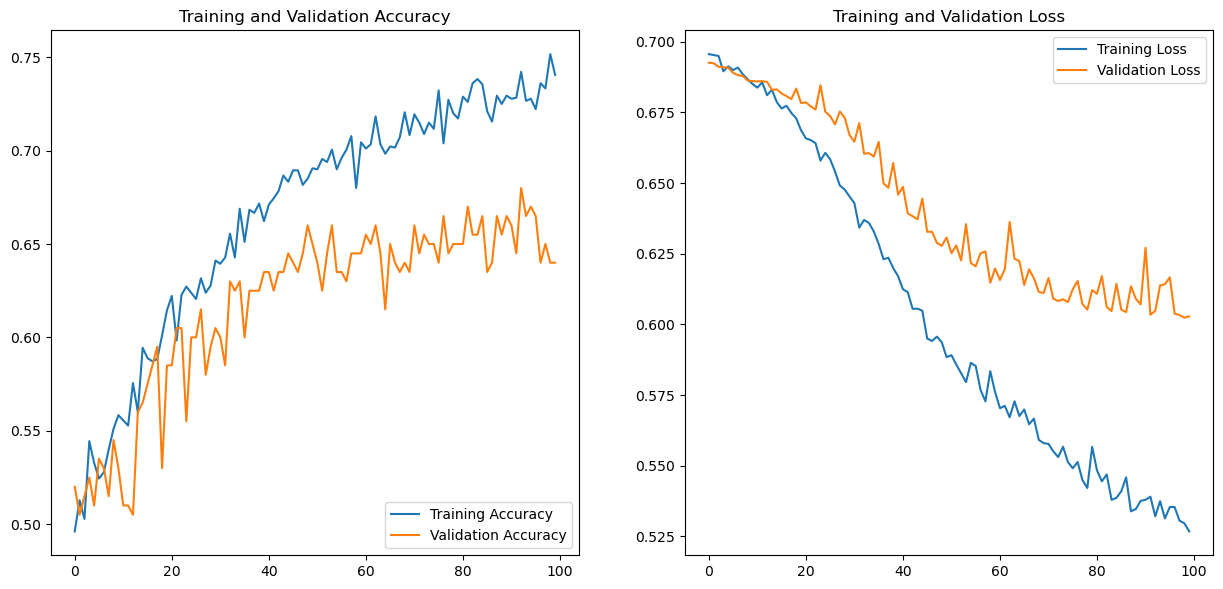

In [34]:
epochs_range = range(100)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
test_loss, test_acc = model.evaluate(x_val, y_val)

print('Test accuracy: {} Test Loss: {}'.format(test_acc*100, test_loss*100))

7/7 [==============================] - 0s 10ms/step - loss: 0.6028 - accuracy: 0.6400
Test accuracy: 63.999998569488525 Test Loss: 60.28245687484741


In [36]:
y_pred=model.predict(x_val)
y_pred=np.argmax(y_pred,axis=1)
print(y_pred)

7/7 [==============================] - 0s 10ms/step
[1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]


Printing Confusion Matrix
 [[58 42]
 [30 70]]


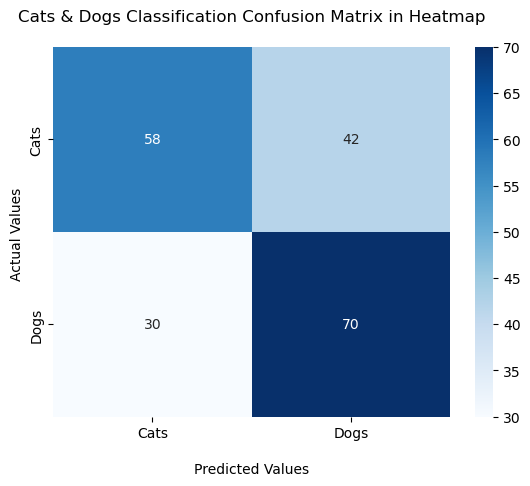

In [37]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_val,y_pred )

print("Printing Confusion Matrix\n", cf_matrix)

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Cats & Dogs Classification Confusion Matrix in Heatmap\n');
ax.set_xlabel('\nPredicted Values')
ax.xaxis.set_ticklabels(['Cats','Dogs'])
ax.set_ylabel('Actual Values ');
ax.yaxis.set_ticklabels(['Cats','Dogs'])

## Ticket labels - List must be in alphabetical order

## Display the visualization of the Confusion Matrix.
plt.show()

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred, y_val, target_names=labels))

              precision    recall  f1-score   support

        cats       0.58      0.66      0.62        88
        dogs       0.70      0.62      0.66       112

    accuracy                           0.64       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.65      0.64      0.64       200



In [39]:
#Improved Image Classifier

In [41]:
model2 = Sequential()
model2.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(64, 64, 3)))
model2.add(MaxPool2D())

model2.add(Conv2D(32, 3, padding="same", activation="relu"))
model2.add(MaxPool2D())

model2.add(Conv2D(32, 3, padding="same", activation="relu"))
model2.add(MaxPool2D())

model2.add(Conv2D(64, 3, padding="same", activation="relu"))
model2.add(MaxPool2D())
model2.add(Dropout(0.4))

model2.add(Flatten())
model2.add(Dense(128, activation="relu"))
model2.add(Dense(2, activation="softmax"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 32)         

In [42]:
opt = Adam(learning_rate=0.00001)
model2.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [43]:
history = model2.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100


C:\Users\sndyg\anaconda3\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


57/57 [==============================] - 3s 29ms/step - loss: 0.6979 - accuracy: 0.5100 - val_loss: 0.6929 - val_accuracy: 0.5150
Epoch 2/100
57/57 [==============================] - 2s 27ms/step - loss: 0.7004 - accuracy: 0.4811 - val_loss: 0.6922 - val_accuracy: 0.5200
Epoch 3/100
57/57 [==============================] - 2s 28ms/step - loss: 0.6933 - accuracy: 0.5039 - val_loss: 0.6917 - val_accuracy: 0.5300
Epoch 4/100
57/57 [==============================] - 1s 26ms/step - loss: 0.6957 - accuracy: 0.5044 - val_loss: 0.6914 - val_accuracy: 0.5200
Epoch 5/100
57/57 [==============================] - 1s 26ms/step - loss: 0.6921 - accuracy: 0.5256 - val_loss: 0.6912 - val_accuracy: 0.5300
Epoch 6/100
57/57 [==============================] - 1s 25ms/step - loss: 0.6918 - accuracy: 0.5250 - val_loss: 0.6908 - val_accuracy: 0.5650
Epoch 7/100
57/57 [==============================] - 2s 28ms/step - loss: 0.6937 - accuracy: 0.5133 - val_loss: 0.6906 - val_accuracy: 0.5600
Epoch 8/100
57/57 

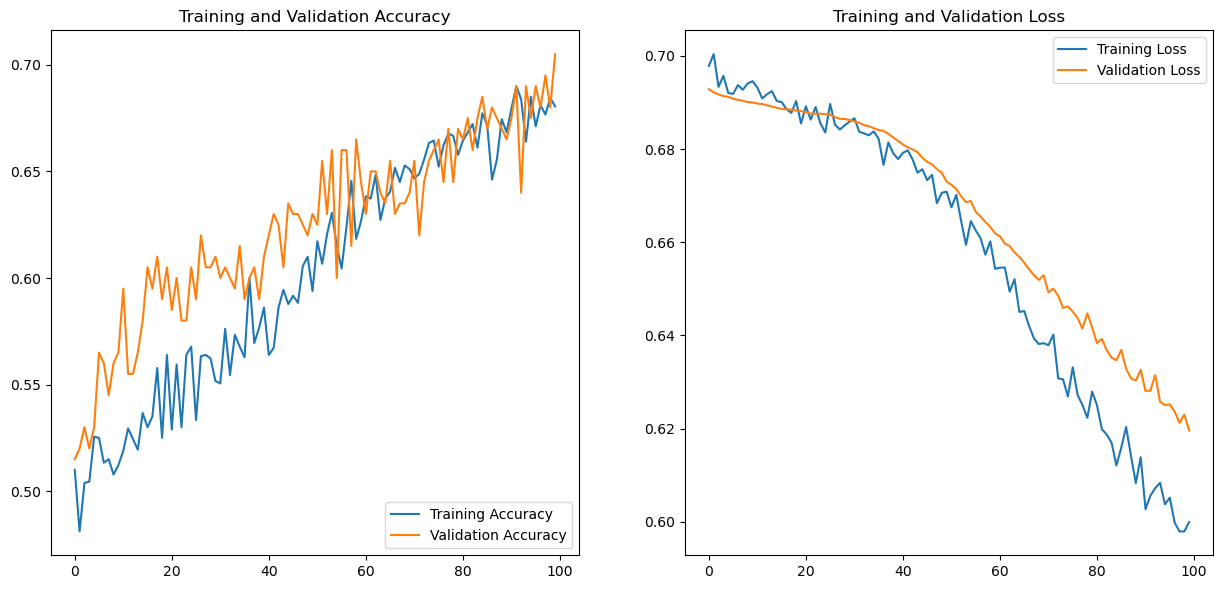

In [44]:
epochs_range = range(100)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
test_loss, test_acc = model2.evaluate(x_val, y_val)

print('Test accuracy: {} Test Loss: {}'.format(test_acc*100, test_loss*100))

7/7 [==============================] - 0s 9ms/step - loss: 0.6196 - accuracy: 0.7050
Test accuracy: 70.49999833106995 Test Loss: 61.959308385849


In [46]:
# Predict
y_pred = model2.predict(x_val)
y_pred = np.argmax(y_pred,axis=1)
print(y_pred)

7/7 [==============================] - 0s 9ms/step
[1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0
 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0]


Printing Confusion Matrix
 [[68 32]
 [27 73]]


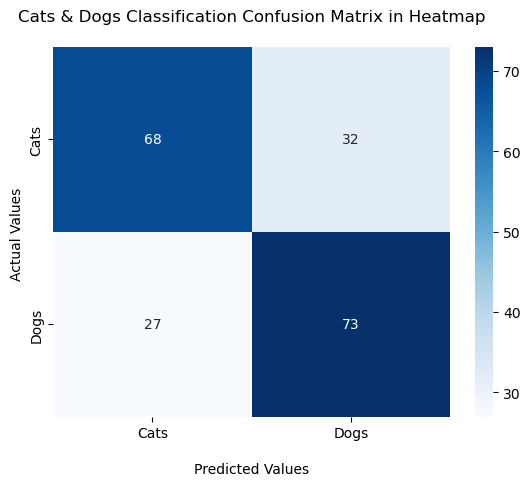

In [47]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cf_matrix = confusion_matrix(y_val,y_pred )

print("Printing Confusion Matrix\n", cf_matrix)

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Cats & Dogs Classification Confusion Matrix in Heatmap\n');
ax.set_xlabel('\nPredicted Values')
ax.xaxis.set_ticklabels(['Cats','Dogs'])
ax.set_ylabel('Actual Values ');
ax.yaxis.set_ticklabels(['Cats','Dogs'])

## Ticket labels - List must be in alphabetical order

## Display the visualization of the Confusion Matrix.
plt.show()

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred, y_val, target_names=labels))

              precision    recall  f1-score   support

        cats       0.68      0.72      0.70        95
        dogs       0.73      0.70      0.71       105

    accuracy                           0.70       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.71      0.70      0.71       200



In [49]:
from tensorflow import keras
model2.save('cats&dogs.h5')

C:\Users\sndyg\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
#Web Application for Image Classification

In [70]:
import os
import numpy as np
from keras.preprocessing import image

In [71]:
from keras.models import load_model
def get_model():
    global model
    model = load_model('cats&dogs.h5') #load a previously trained model and apply another use case.
    print("Model loaded!")

In [72]:
img_path="C:/Users/sndyg/Downloads/cats_dogs2/Static"

In [73]:
def load_image(img_path):

    img = image.load_img(img_path, target_size=(64, 64))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    return img_tensor

In [74]:
def prediction(img_path):
    new_image = load_image(img_path)
    
    pred = model.predict(new_image)
    
    print(pred)
    
    labels=np.array(pred)
    labels[labels>=0.6]=1
    labels[labels<0.6]=0
    
    print(labels)
    final=np.array(labels)
    
    if final[0][0]==1:
        return "Cats"
    else:
        return "Dogs"

In [75]:
from flask import Flask, render_template  #import
from flask import request
app = Flask(__name__)                                    #calling

In [76]:
get_model()

Model loaded!


In [77]:
@app.route("/", methods=['GET', 'POST'])
def home():

    return render_template("C:/Users/sndyg/Downloads/cats_dogs2/Template/home.html")

@app.route("/predict", methods = ['GET','POST'])
def predict():
    
    if request.method == 'POST':
        
        file = request.files['file']
        filename = file.filename
        file_path = os.path.join("C:/Users/sndyg/Downloads/cats_dogs2/Static", filename)       
        file.save(file_path)
        print(filename)
        product = prediction(file_path)
        print(product)
        
    return render_template("C:/Users/sndyg/Downloads/cats_dogs2/Template/predict.html", product = product, user_image = file_path)            #file_path can or may used at the place of filename


In [78]:
if __name__ == "__main__":
    app.run()  

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
[2023-11-22 15:55:44,371] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\sndyg\anaconda3\Lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sndyg\anaconda3\Lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sndyg\anaconda3\Lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sndyg\anaconda3\Lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sndyg\AppData\Local\Temp\ipykernel_9148\1611480646.py"